<a href="https://colab.research.google.com/github/dipta007/Movie-Recommendation/blob/development/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount the Google Drive

In [0]:
from google.colab import drive
from os.path import join
import os

ROOT = '/content/drive'     # default for the drive
PROJ = 'My Drive/Colab_data/MR1'       # path to your project on Drive
drive.mount(ROOT)           # we mount the drive at /content/drive

PROJECT_PATH = join(ROOT, PROJ)
!mkdir "{PROJECT_PATH}"    # in case we haven't created it already   
%cd "{PROJECT_PATH}"
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/My Drive/Colab_data/MR1’: File exists
/content/drive/My Drive/Colab_data/MR1
data/  multilayer_perceptron_graph.png


# Get the ratings

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd

DATA_PATH = './data/ml-latest-small'

ratings = pd.read_csv(f"{DATA_PATH}/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Get all the movies and their mapping

In [0]:
movies = pd.read_csv(f"{DATA_PATH}/movies.csv")
movies_ind_to_name = dict(zip(movies.movieId, movies.title))
movies_name_to_ind = dict(zip(movies.title, movies.movieId))
movies_ind_to_genre = dict(zip(movies.movieId, movies.genres))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Get all the Genres

In [0]:
maxLen = max(movies['genres'].apply(lambda x: len(x.split('|'))))

def make_all_same(x):
  now = x.split("|")
  while len(now) < maxLen:
    now.append("")
  return now

movies['genres_list'] = movies['genres'].apply(make_all_same)

In [0]:
s = set()
for v in movies['genres_list'].values:
  for g in v:
    s.add(g)

n_genres = len(s)
n_genres

21

In [0]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
joined_ratings = pd.merge(ratings, movies, "inner", "movieId")
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres,genres_list
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta..."
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta..."
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta..."
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta..."
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta..."


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

user_enc = LabelEncoder()
joined_ratings['user'] = user_enc.fit_transform(joined_ratings['userId'].values)
n_users = joined_ratings['user'].nunique()

movie_enc = LabelEncoder()
movie_enc.fit(movies['movieId'])
joined_ratings['movie'] = movie_enc.transform(joined_ratings['movieId'].values)
n_movies = movies['movieId'].nunique()

joined_ratings['rating'] = joined_ratings['rating'].values.astype(np.float32)
min_rating = min(joined_ratings['rating'])
max_rating = max(joined_ratings['rating'])

joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres,genres_list,user,movie
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta...",0,0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta...",4,0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta...",6,0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta...",14,0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fanta...",16,0


In [0]:
genre_enc = LabelEncoder()
genre_enc.fit(list(s))
joined_ratings['genres_list'] = joined_ratings['genres_list'].apply(lambda x: genre_enc.transform(x))
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres,genres_list,user,movie
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",0,0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",4,0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",6,0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",14,0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",16,0


In [0]:
final_one = joined_ratings.drop(['timestamp', 'genres'], axis=1)
final_one.head()

,userId,movieId,rating,title,genres_list,user,movie
0,1,1,4.0,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",0,0
1,5,1,4.0,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",4,0
2,7,1,4.5,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",6,0
3,15,1,2.5,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",14,0
4,17,1,4.5,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",16,0


In [0]:
del joined_ratings
del ratings
import gc
gc.collect()

1089

In [0]:
final_one.head()

,userId,movieId,rating,title,genres_list,user,movie
0,1,1,4.0,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",0,0
1,5,1,4.0,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",4,0
2,7,1,4.5,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",6,0
3,15,1,2.5,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",14,0
4,17,1,4.5,Toy Story (1995),"[3, 4, 5, 6, 10, 0, 0, 0, 0, 0]",16,0


In [0]:
n_users, n_movies, n_genres

(610, 9742, 21)

In [0]:
X1 = final_one[['user', 'movie']].values
X2 = np.array([list(val) for val in final_one['genres_list'].values])
X = np.concatenate((X1, X2), axis=1)
y = final_one['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90752, 12), (10084, 12), (90752,), (10084,))

In [0]:
X_train_array = [X_train[:, 0], X_train[:, 1], X_train[:, 2:]]
X_test_array = [X_test[:, 0], X_test[:, 1], X_test[:, 2:]]

In [0]:
del X_train
del X_test
import gc
gc.collect()

84

In [0]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l2
from keras.layers import Concatenate, Dense, Dropout, Activation, Lambda, LSTM, Flatten
from keras.layers import Concatenate, Dense, Dropout

class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal',
                      embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        return x

def Model1(min_rating, max_rating):
    user = Input(shape=(1,))
    u = Embedding(n_users, 50)(user)
    u = Flatten()(u)
    
    movie = Input(shape=(1,))
    m = Embedding(n_movies, 50)(movie)
    m = Flatten()(m)

    genre = Input(shape=(10,))
    g = Embedding(n_genres, 20)(genre)
    g = Flatten()(g)
    
    x = Concatenate()([u, m, g])
    # x = Dropout(0.05)(x)
    
    x = Dense(128, kernel_initializer='he_normal', activation="relu")(x)

    x = Dense(10, kernel_initializer='he_normal', activation="relu")(x)
    # x = Dropout(0.5)(x)
    
    x = Dense(1, kernel_initializer='he_normal', activation="sigmoid")(x)

    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
    
    model = Model(inputs=[user, movie, genre], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
    return model

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_68 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_69 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_70 (InputLayer)           (None, 10)           0                                            
__________________________________________________________________________________________________
embedding_66 (Embedding)        (None, 1, 50)        30500       input_68[0][0]                   
___________________________________________________________________________________________

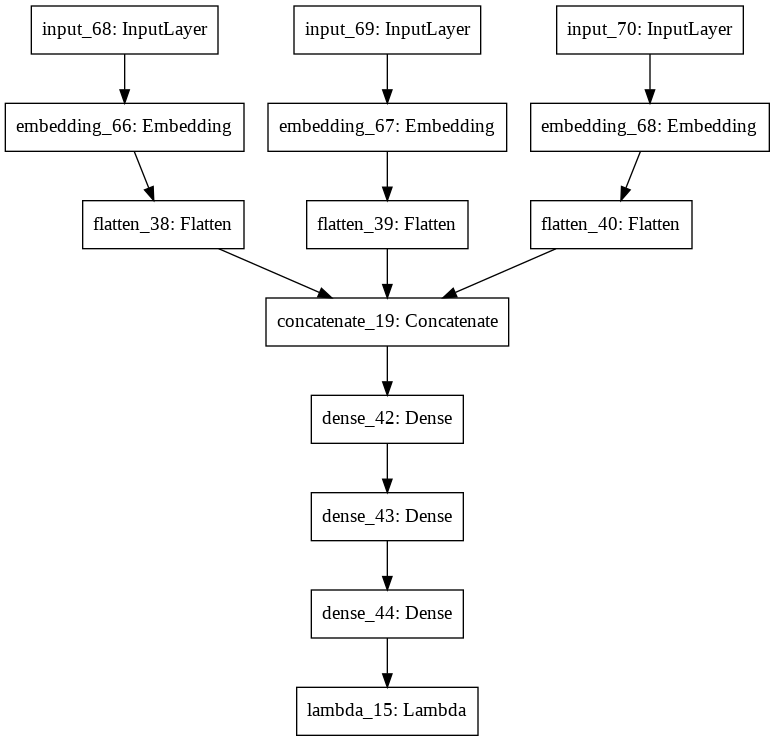

In [0]:
model = Model1(min_rating, max_rating)
model.summary()

from keras.utils import plot_model
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = []
callbacks.append(EarlyStopping(monitor='val_loss', patience=4))
callbacks.append(ModelCheckpoint('./model',  monitor='val_loss', save_best_only=True))

In [0]:
# np.array(X_train_array).shape
# np.array(X_train_array[2]).shape
# X_train_array[2]
# X_train_array[2]

In [0]:
history = model.fit(x=X_train_array, y=y_train, batch_size=128, epochs=50,
                    verbose=1, validation_data=(X_test_array, y_test),
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 90752 samples, validate on 10084 samples
Epoch 1/50
90752/90752 [==============================] - 4s 47us/step - loss: 0.8335 - accuracy: 0.3010 - val_loss: 0.7309 - val_accuracy: 0.3210
Epoch 2/50
90752/90752 [==============================] - 4s 46us/step - loss: 0.6936 - accuracy: 0.3314 - val_loss: 0.7124 - val_accuracy: 0.3294
Epoch 3/50
90752/90752 [==============================] - 4s 45us/step - loss: 0.6479 - accuracy: 0.3416 - val_loss: 0.7156 - val_accuracy: 0.3265
Epoch 4/50
90752/90752 [==============================] - 4s 46us/step - loss: 0.6151 - accuracy: 0.3515 - val_loss: 0.7169 - val_accuracy: 0.3308
Epoch 5/50
90752/90752 [==============================] - 4s 45us/step - loss: 0.5851 - accuracy: 0.3619 - val_loss: 0.7211 - val_accuracy: 0.3318
Epoch 6/50
90752/90752 [==============================] - 4s 46us/step - loss: 0.5536 - accuracy: 0.3703 - val_loss: 0.7211 - val_accuracy: 0.3337
